Общая информация о наборе данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Основные статистики по числовым столбцам:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    

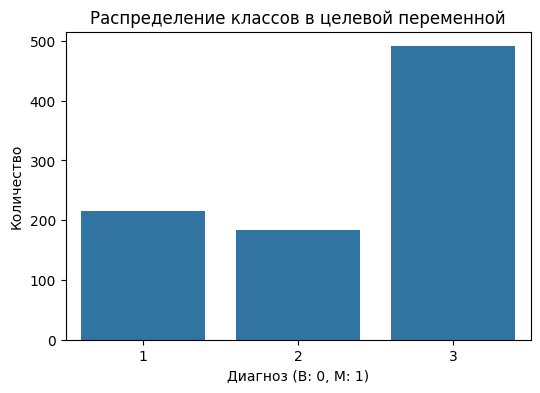

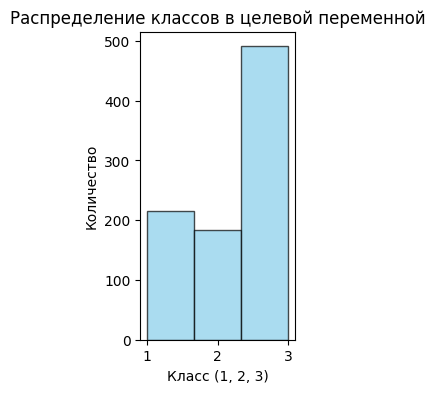

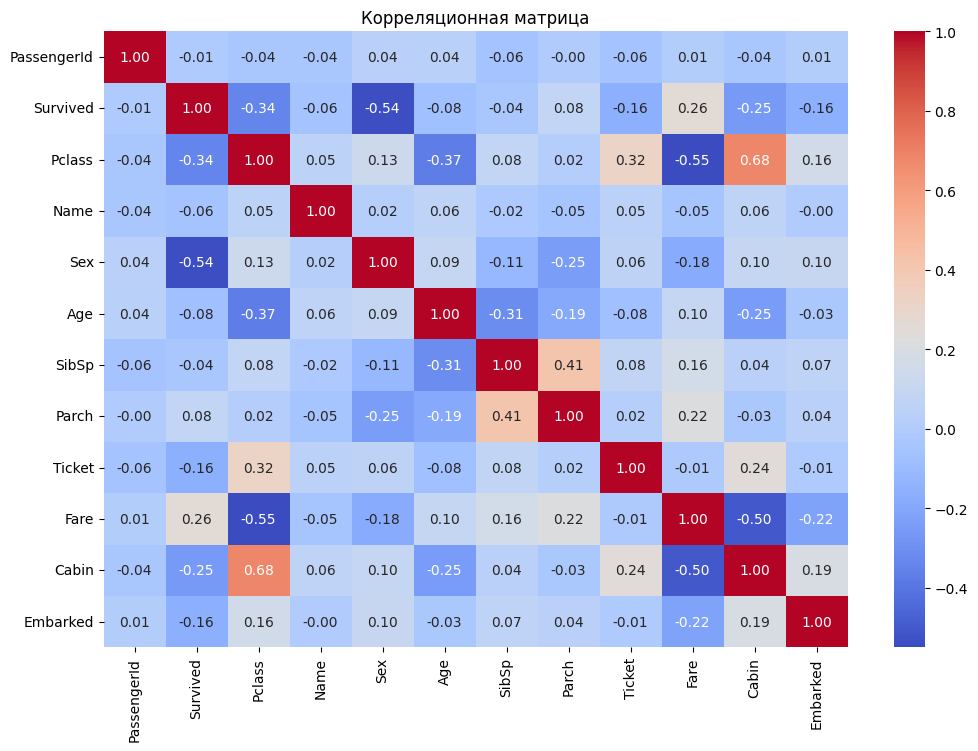

IndexError: tuple index out of range

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Чтение данных
data = pd.read_csv("train.csv")

# Первоначальный обзор данных
print("Общая информация о наборе данных:")
print(data.info())

# Основные статистики по числовым столбцам
print("\nОсновные статистики по числовым столбцам:")
print(data.describe())

# Проверка пропущенных значений
print("\nКоличество пропущенных значений по столбцам:")
print(data.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:")
print(data.duplicated().sum())

# Преобразование категориальных признаков
# Преобразуем все строковые столбцы в числа, исключая целевую переменную
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    labelencoder = LabelEncoder()
    data[col] = labelencoder.fit_transform(data[col].astype(str))

# Определение признаков и целевой переменной
X = data.iloc[:, 2:].values  # Все числовые признаки начиная с третьего столбца
y = data.iloc[:, 1].values  # "Pclass" - целевая переменная (или другая, в зависимости от ваших данных)
print("\nМатрица признаков (первые 5 строк):")
print(X[:5])
print("\nЗависимая переменная (первые 5 значений):")
print(y[:5])

# Обработка пропущенных значений
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X = imputer.fit_transform(X)

print("\nМатрица признаков после обработки пропущенных значений (первые 5 строк):")
print(X[:5])

# Кодирование целевой переменной
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

# Деление данных на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, {y_train.shape}")
print(f"Тестовая выборка: {X_test.shape}, {y_test.shape}")

# Модель
model = RandomForestClassifier(random_state=42)

# Кросс-валидация на обучающей выборке
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')

print("\nКросс-валидация на обучающей выборке:")
print(f"Скорости на каждом фолде: {cv_scores}")
print(f"Средняя точность: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

# Визуализация распределения целевой переменной
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=data)
plt.title("Распределение классов в целевой переменной")
plt.xlabel("Диагноз (B: 0, M: 1)")
plt.ylabel("Количество")
plt.show()

# Визуализация распределения значений целевой переменной
plt.figure(figsize=(2, 4))
plt.hist(data['Pclass'], bins=3, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Распределение классов в целевой переменной")
plt.xlabel("Класс (1, 2, 3)")
plt.ylabel("Количество")
plt.show()

# Корреляционная матрица
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

X_train_df = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])

# Выбор признаков для визуализации
feature_1 = X_train_df.columns[0]  # Первый признак
feature_2 = X_train_df.columns[1]  # Второй признак
feature_3 = X_train_df.columns[2]  # Третий признак
Pclass = y_train  # Целевой признак (диагноз)

# Построение scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_df[feature_1], y=X_train_df[feature_2], hue=Pclass, palette="viridis", alpha=0.7)
plt.title(f"Распределение пассажиров {feature_1}, {feature_2}, {feature_3} по классам", fontsize=14)
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.ylabel(feature_3)
plt.legend(title="Классы")
plt.show()
